In [1]:
#####################################################################################################################
#Developed by Jonathan Ojeda 26/1/2021 QAAFI UQ
# Code functionalities:
# Import apsim classic files and compare OBS vs PRE data
# Read several files from a folder and merge them in a single pandas dataframe
# Create scatter plots and add error bars
#####################################################################################################################

In [2]:
#import libraries
import random as rd
import os
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dateutil
import pylab as py
import seaborn as sns
import scipy 
from scipy import stats
import sklearn.metrics
from numpy  import array
import glob
import functools
from functools import reduce
import matplotlib.ticker as ticker
import cartopy.io.shapereader as shpreader
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

from sklearn.cluster import KMeans

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-2-f27bbb6f6f6b>:28: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,


In [34]:
#read simulated data from APSIM Classic out files
filelist = glob.glob(r'C:\Users\uqjojeda\Dropbox\RanjuPython\*D.out')
frame = pd.DataFrame()
list = []

for file in filelist:
    df = pd.read_csv(file)
    df.drop(df.index[[0,2]])
    df[['Date', 'biomass_wt', 'biomass_n', 'leafTotalWt', 'TuberTotalWt',
        'TotalWt', 'esw', 'drain', 'es', 'eo', 'swdef_photo', 'nfact_photo',
        'nfact_expan', 'swdef_expan','Title']] = df['ApsimVersion = 7.10 r4210'].str.split(n=14, expand=True)
    a = df.drop(['ApsimVersion = 7.10 r4210'], axis=1)
    b = a.drop(df.index[[0,1,2]])
    #Create categories
    b['location'] = b['Title'].str.slice(0,2)
    b['soil_model'] = b['Title'].str.slice(3,5)
    b['env'] = b['Title'].str.slice(6,9)
    b['Year'] = b['Date'].str.slice(6,10)
    #Change dtype from string to float
    b["esw"] = b["esw"].astype(str).astype(float)
    
    list.append(b)
    
all_sim = pd.concat(list)

In [31]:
all_sim.dtypes

Date             object
biomass_wt       object
biomass_n        object
leafTotalWt      object
TuberTotalWt     object
TotalWt          object
esw             float64
drain            object
es               object
eo               object
swdef_photo      object
nfact_photo      object
nfact_expan      object
swdef_expan      object
Title            object
location         object
soil_model       object
env              object
Year             object
dtype: object

In [497]:
#df.to_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Validation\df_final.csv')

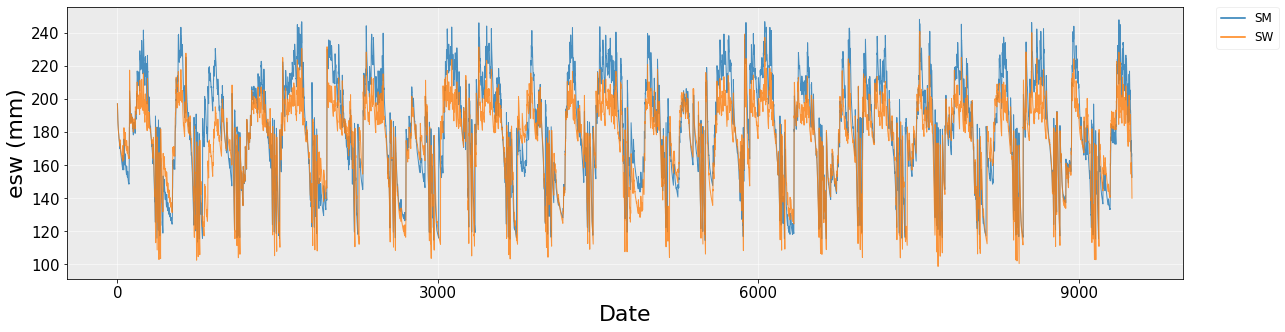

In [37]:
#purdue['obs_biomass2'] = purdue['obs_biomass']/1000
#purdue['sim_biomass2'] = purdue['sim_biomass']/1000

#plot

fig = plt.figure(figsize=(20,5))

ax=plt.subplot(1, 1, 1)
sns.lineplot(x="Date", y="esw", hue='soil_model', alpha=0.8, data=all_sim, linewidth=1)

# Formatting graph and background
plt.legend(prop=dict(size=12),bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0., ncol=1,framealpha=0.3,markerscale=2)
plt.ylabel('esw (mm)', fontsize =22)
plt.xlabel('Date', fontsize =22)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.92')
ax.set_axisbelow(True)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(3000))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(7.5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.set_xlim([0.01,xmax])
#ax.set_ylim([0.01,ymax])
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y',which='both',left=True)
#ax.get_legend().remove()

# #Plot statistical values
# plt.text(xmax*0.02, ymax*0.9,'(a)',fontsize=22,color='k',weight='bold')
# plt.text(xmax*0.53, ymax*0.15,'n='+N,fontsize=16,color='k')
# #plt.text(xmax*0.60, ymax*0.2,'MSE='+MSE+' $t\,ha^{-1}$',fontsize=11,color='k')
# plt.text(xmax*0.53, ymax*0.09,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=16,color='k')
# plt.text(xmax*0.53, ymax*0.03,'CCC='+CCC,fontsize=16,color='k')
# #plt.text(xmax*0.45, ymax*0.01,'NSE='+NSE,fontsize=11,color='k')

#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\Validation\Figs\val2.png', dpi=300,bbox_inches='tight')